# **Tugas Besar Machine Learning**
## **Jumlah pengunjung telecenter palapa tahun 2017-2021 di Kota Mojokerto**

---
### Nama Kelompok:
1. Annisa Aulia Arafah (1202190038)
2. Dinda Tresna Teja Nirwana (1202190050)
3. Novandy Prakoso (1202190057)
4. Catharina Prisca Titi Larasati (1202192049)


## 1. Identifikasi Masalah

### Tele Center milik Pemkot Mojokerto yang berada di Gedung Mojokerto Service City (GMSC) Jalan Gajah Mada tidak pernah sepi pengunjung.Setiap puluhan pengujung mengantri untuk belajar IT di tempat ini. Dari hasil pengumpulan data dari tahun 2017 sampai 2021, didapatkan jumlah pengunjung perbulan tiap tahunnya. Oleh karena itu kita analisis perbandingan jumlah pengunjung per tahunnya dan melakukan prediksi beberapa bulan ke depan.

## Pre Processing Data

In [ ]:
#import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
#untuk melakukan pengambilan dataset, pada kasus ini mengambil dataset pengunjung telecenter palapa kota mojokerto
df = pd.read_csv ("datapengunjung.csv", usecols=['tahun', 'bulan', 'jumlah'])
#menampilkan sample data, disini kami menampilkan 10 data teratas
df.head(10)

,tahun,bulan,jumlah
0,2017,1,153
1,2017,2,124
2,2017,3,375
3,2017,4,321
4,2017,5,184
5,2017,6,106
6,2017,7,263
7,2017,8,148
8,2017,9,169
9,2017,10,276


In [ ]:
#menampilkan deskripsi dataset yang digunakan, terlihat bahwa data yang kami gunakan dari tahun 2017-2021
df.describe()

,tahun,bulan,jumlah
count,60.000000,60.000000,60.000000
mean,2019.000000,6.500000,600.916667
std,1.426148,3.481184,725.006564
min,2017.000000,1.000000,61.000000
25%,2018.000000,3.750000,195.250000
50%,2019.000000,6.500000,324.000000
75%,2020.000000,9.250000,676.750000
max,2021.000000,12.000000,3451.000000


In [ ]:
#menampilkan informasi dataset, terlihat bahwa tidak ada nilai null dan type data yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tahun   60 non-null     int64
 1   bulan   60 non-null     int64
 2   jumlah  60 non-null     int64
dtypes: int64(3)
memory usage: 1.5 KB


In [ ]:
#melakukan pemeriksaan nilai null
df.isnull().sum()

tahun     0
bulan     0
jumlah    0
dtype: int64

In [ ]:
#menampilkan bentuk data (baris, kolom)
#dataset terdiri atas 60 baris dan 5 kolom
df.shape

(60, 3)

In [ ]:
#cek apakah terdapat nilai duplikat di dataset
df.duplicated().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


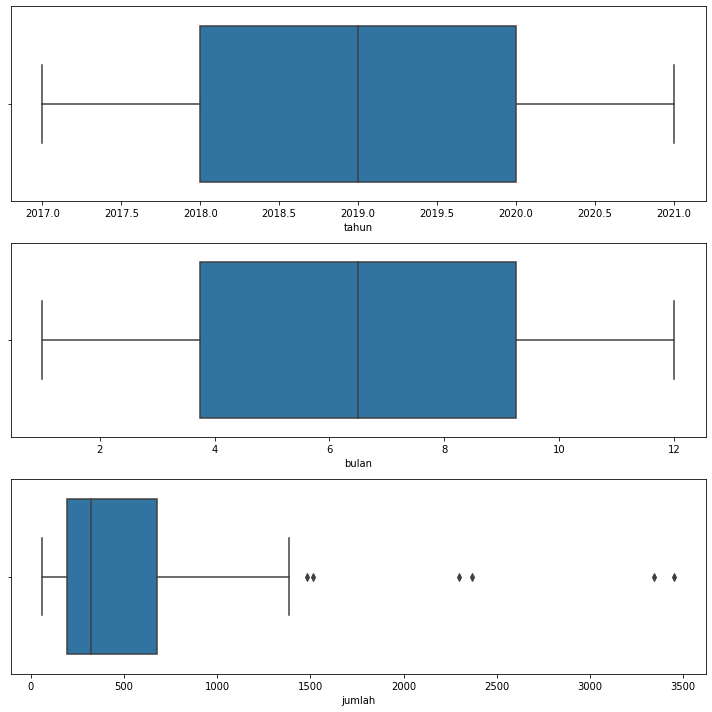

In [ ]:
#cek apakah terdapat outliers
fig, axs = plt.subplots(3, figsize = (10,10))
plt1 = sns.boxplot(df['tahun'], ax = axs[0])
plt2 = sns.boxplot(df['bulan'], ax = axs[1])
plt3 = sns.boxplot(df['jumlah'], ax = axs[2])

plt.tight_layout()

## Visualisasi Data

In [ ]:
#memilih tabel apa saja yang akan digunakan, pada kasus ini hanya menggunakan tahun, bulan dan jumlah 
data = df.pivot("tahun", "bulan", "jumlah")
#menampilkan 5 data teratas, cek apakah sudah sesuai
data.head()

bulan,1,2,3,4,5,6,7,8,9,10,11,12
tahun,,,,,,,,,,,,
2017,153,124,375,321,184,106,263,148,169,276,216,179
2018,359,489,247,349,234,199,222,375,327,327,248,455
2019,364,944,902,628,614,455,933,1383,1513,1193,1152,416
2020,1164,2369,308,339,61,61,123,208,145,624,3451,864
2021,2296,3342,1480,823,94,170,306,180,145,233,218,209


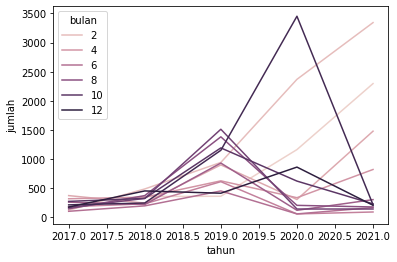

In [ ]:
sns.lineplot(data=df, x="tahun", y="jumlah", hue="bulan")

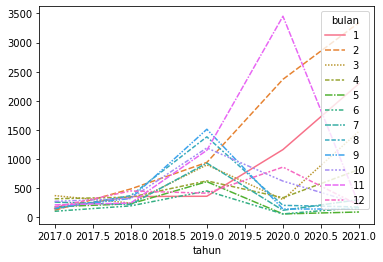

In [ ]:
sns.lineplot(data=data)

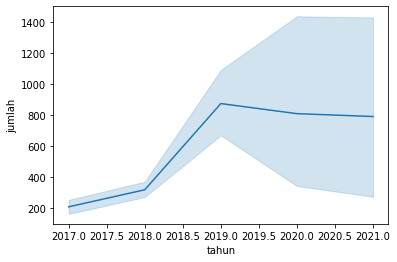

In [ ]:
sns.lineplot(data=df, x="tahun", y="jumlah")

## Modelling Prediksi beberapa bulan ke depan*

### Pada bagian ini kami mencoba melakukan prediksi terhadap jumlah pengunjung beberapa bulan ke depan, yaitu dengan memasukkan bulan januari ttahun 2022

In [ ]:
#menunjukan 5 data teratas
df.head()

,tahun,bulan,jumlah
0,2017,1,153
1,2017,2,124
2,2017,3,375
3,2017,4,321
4,2017,5,184


In [ ]:
#membuat variabel x dan y
x = df[['tahun', 'bulan']]
y = df['jumlah']

In [ ]:
#split data dengan perbandingan 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [ ]:
#cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42, 2)
(42,)
(18, 2)
(18,)


In [ ]:
#Buat objek linear regresi
lin = LinearRegression()

In [ ]:
#train the model, menggunakan data training
lin.fit(x_train, y_train)

LinearRegression()

In [ ]:
#mencari nilai koefisien dan intercept
print(lin.coef_)
print(lin.intercept_)

[156.09070592 -24.70555027]
-314384.59110009385


In [ ]:
#Buat ke dalam data frame agar lebih rapi
coef_dict = {
    'features' : x.columns,
    'coef_value' : lin.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features','coef_value'])
coef

,features,coef_value
0,tahun,156.090706
1,bulan,-24.705550


In [ ]:
y_pred = lin.predict(x_test)

In [ ]:
#Mencari score akurasi dari model yang digunakan dengan menggunakan data testing
lin.score(x_test, y_test)

0.2200088393956663

Dari hasil test akurasi yang dilakukan di atas, terlihat bahwa akurasi dari model Linear Regresi yang dilakukan adalah sebesar 22%

In [ ]:
#prediksi jumlah pengunjung telecenter palapa
lin.predict([[2022, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1206.11071922])

Dari hasil di atas, diperkirakan jumlah pengunjung telecenter palapa pada bulan januari tahun 2022 adalah sebanyak 1206 Orang

## Hubungan Variabel dengan Jumlah
### Pada tahap ini, kami mencoba untuk mengukur hubungan antara variabel tahun dan bulan terhadap variabel jumlah

In [ ]:
#import library yang dibutuhkan

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#variabel [x] dan juga tabel yang menjadi target [y=jumlah]

x = df[['tahun', 'bulan']]
y = df['jumlah']

In [ ]:
#split data menjadi data testing dan training

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [ ]:
#untuk melihat report dari model yang telah dipilih untuk cek hubungan antara variabel anggota dengan variabel taget

Input = sm.add_constant(x_train)
SimpleModel = sm.OLS(y_train, x_train, missing="drop")
results = SimpleModel.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#print hasil rangkuman agar dapat membaca hasil

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 jumlah   R-squared (uncentered):                   0.417
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              14.31
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                    2.05e-05
Time:                        03:57:30   Log-Likelihood:                         -340.30
No. Observations:                  42   AIC:                                      684.6
Df Residuals:                      40   BIC:                                      688.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Eksplorasi Data (EDA)

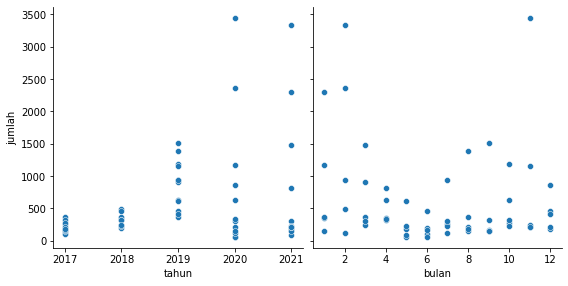

In [ ]:
sns.pairplot(df, x_vars=['tahun', 'bulan'], y_vars='jumlah', height=4, aspect=1, kind='scatter')
plt.show()



*   Berdasarkan hasil pairplot yang ditampilkan dapat disimpulkan bahwa tahun memiliki korelasi yang positif terhadap jumlah
*   Berdasarkan hasil pairplot dapat disimpulkan bahwa bulan juga berkoleasi dengan jumlah



In [ ]:
#mengetahui nilai korelasi dari independent variable dan dependepnt variabel
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,tahun,bulan,jumlah
tahun,1.00,0.00,0.33
bulan,0.00,1.00,-0.15
jumlah,0.33,-0.15,1.00


In [ ]:
data1 = df[['tahun', 'jumlah']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tahun   60 non-null     int64
 1   jumlah  60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


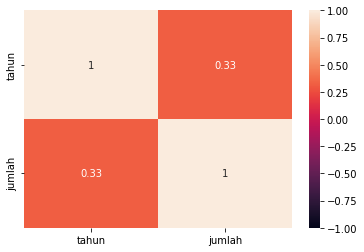

In [ ]:
sns.heatmap(data1.corr(), vmin=-1, vmax=1, annot = True)
plt.show()

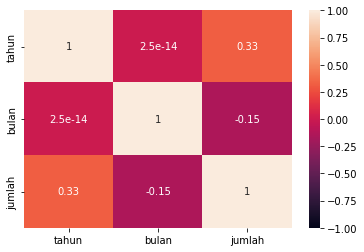

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True)
plt.show()